In [31]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras

In [32]:
# Load your dataset
# Assuming your dataset has columns 'datetime', 'total_visitor', 'total_accomodation'
# Adjust the file path accordingly

data = pd.read_csv('KepRiau 2015 - 2022.csv')

# Convert 'datetime' column to datetime type
data['datetime'] = pd.to_datetime(data['datetime'])

# Set 'datetime' column as index
data.set_index('datetime', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Define your input and output variables
X = data_scaled[:, 1]  # 'total_accomodation' as input
y = data_scaled[:, 0]  # 'total_visitor' as output



TEST SIZE 80: 20

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [34]:
# Reshape data for LSTM input
X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))

In [35]:
# Build and Train the LSTM Model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50
3/3 - 2s - loss: 0.3157 - val_loss: 0.0384 - 2s/epoch - 564ms/step
Epoch 2/50
3/3 - 0s - loss: 0.3038 - val_loss: 0.0349 - 31ms/epoch - 10ms/step
Epoch 3/50
3/3 - 0s - loss: 0.2921 - val_loss: 0.0320 - 40ms/epoch - 13ms/step
Epoch 4/50
3/3 - 0s - loss: 0.2804 - val_loss: 0.0296 - 31ms/epoch - 10ms/step
Epoch 5/50
3/3 - 0s - loss: 0.2688 - val_loss: 0.0277 - 32ms/epoch - 11ms/step
Epoch 6/50
3/3 - 0s - loss: 0.2579 - val_loss: 0.0264 - 32ms/epoch - 11ms/step
Epoch 7/50
3/3 - 0s - loss: 0.2470 - val_loss: 0.0257 - 29ms/epoch - 10ms/step
Epoch 8/50
3/3 - 0s - loss: 0.2363 - val_loss: 0.0255 - 32ms/epoch - 11ms/step
Epoch 9/50
3/3 - 0s - loss: 0.2256 - val_loss: 0.0260 - 32ms/epoch - 11ms/step
Epoch 10/50
3/3 - 0s - loss: 0.2156 - val_loss: 0.0271 - 32ms/epoch - 11ms/step
Epoch 11/50
3/3 - 0s - loss: 0.2052 - val_loss: 0.0288 - 39ms/epoch - 13ms/step
Epoch 12/50
3/3 - 0s - loss: 0.1955 - val_loss: 0.0313 - 31ms/epoch - 10ms/step
Epoch 13/50
3/3 - 0s - loss: 0.1858 - val_loss: 0.

In [36]:
# Evaluate the Model
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

1/1 [==============================] - 0s 376ms/step
Mean Squared Error (MSE): 10328990.925176408
Mean Absolute Error (MAE): 3077.4314386699466
Mean Absolute Percentage Error (MAPE): 29.65%


In [37]:
# Forecasting
# Forecast for the next 12 periods
future_periods = 12
X_future = np.linspace(X[-1], X[-1] + future_periods, future_periods).reshape(-1, 1, 1)
y_future_pred = model.predict(X_future)

# Inverse transform the scaled predictions
y_future_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_future_pred), y_future_pred)))[:, 1]

# Create a date range for the future periods
future_dates = pd.date_range(start=data.index[-1], periods=future_periods + 1, freq='M')[1:]

1/1 [==============================] - 0s 35ms/step


TEST SIZE 70:30

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [39]:
# Reshape data for LSTM input
X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))

In [40]:
# Build and Train the LSTM Model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50
3/3 - 3s - loss: 0.3779 - val_loss: 0.0314 - 3s/epoch - 861ms/step
Epoch 2/50
3/3 - 0s - loss: 0.3627 - val_loss: 0.0279 - 36ms/epoch - 12ms/step
Epoch 3/50
3/3 - 0s - loss: 0.3479 - val_loss: 0.0251 - 42ms/epoch - 14ms/step
Epoch 4/50
3/3 - 0s - loss: 0.3331 - val_loss: 0.0229 - 33ms/epoch - 11ms/step
Epoch 5/50
3/3 - 0s - loss: 0.3190 - val_loss: 0.0213 - 51ms/epoch - 17ms/step
Epoch 6/50
3/3 - 0s - loss: 0.3048 - val_loss: 0.0203 - 44ms/epoch - 15ms/step
Epoch 7/50
3/3 - 0s - loss: 0.2910 - val_loss: 0.0198 - 45ms/epoch - 15ms/step
Epoch 8/50
3/3 - 0s - loss: 0.2774 - val_loss: 0.0200 - 37ms/epoch - 12ms/step
Epoch 9/50
3/3 - 0s - loss: 0.2640 - val_loss: 0.0209 - 67ms/epoch - 22ms/step
Epoch 10/50
3/3 - 0s - loss: 0.2509 - val_loss: 0.0224 - 32ms/epoch - 11ms/step
Epoch 11/50
3/3 - 0s - loss: 0.2379 - val_loss: 0.0246 - 33ms/epoch - 11ms/step
Epoch 12/50
3/3 - 0s - loss: 0.2248 - val_loss: 0.0275 - 50ms/epoch - 17ms/step
Epoch 13/50
3/3 - 0s - loss: 0.2121 - val_loss: 0.

In [41]:
# Evaluate the Model
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

2/2 [==============================] - 0s 0s/step
Mean Squared Error (MSE): 19579159.030574597
Mean Absolute Error (MAE): 4363.830638372043
Mean Absolute Percentage Error (MAPE): 42.28%


In [42]:
# Forecasting
# Forecast for the next 12 periods
future_periods = 12
X_future = np.linspace(X[-1], X[-1] + future_periods, future_periods).reshape(-1, 1, 1)
y_future_pred = model.predict(X_future)

# Inverse transform the scaled predictions
y_future_pred_inv_30 = scaler.inverse_transform(np.column_stack((np.zeros_like(y_future_pred), y_future_pred)))[:, 1]

# Create a date range for the future periods
future_dates_30 = pd.date_range(start=data.index[-1], periods=future_periods + 1, freq='M')[1:]

1/1 [==============================] - 0s 30ms/step


TEST SIZE 60:40

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)

In [44]:
# Reshape data for LSTM input
X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))

In [45]:
# Build and Train the LSTM Model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50
2/2 - 1s - loss: 0.3350 - val_loss: 0.1375 - 1s/epoch - 747ms/step
Epoch 2/50
2/2 - 0s - loss: 0.3253 - val_loss: 0.1328 - 30ms/epoch - 15ms/step
Epoch 3/50
2/2 - 0s - loss: 0.3157 - val_loss: 0.1284 - 33ms/epoch - 16ms/step
Epoch 4/50
2/2 - 0s - loss: 0.3064 - val_loss: 0.1242 - 37ms/epoch - 19ms/step
Epoch 5/50
2/2 - 0s - loss: 0.2971 - val_loss: 0.1203 - 32ms/epoch - 16ms/step
Epoch 6/50
2/2 - 0s - loss: 0.2877 - val_loss: 0.1166 - 31ms/epoch - 15ms/step
Epoch 7/50
2/2 - 0s - loss: 0.2788 - val_loss: 0.1133 - 32ms/epoch - 16ms/step
Epoch 8/50
2/2 - 0s - loss: 0.2698 - val_loss: 0.1102 - 47ms/epoch - 24ms/step
Epoch 9/50
2/2 - 0s - loss: 0.2609 - val_loss: 0.1074 - 31ms/epoch - 16ms/step
Epoch 10/50
2/2 - 0s - loss: 0.2520 - val_loss: 0.1048 - 32ms/epoch - 16ms/step
Epoch 11/50
2/2 - 0s - loss: 0.2434 - val_loss: 0.1026 - 47ms/epoch - 23ms/step
Epoch 12/50
2/2 - 0s - loss: 0.2349 - val_loss: 0.1006 - 32ms/epoch - 16ms/step
Epoch 13/50
2/2 - 0s - loss: 0.2263 - val_loss: 0.

In [46]:
# Evaluate the Model
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

2/2 [==============================] - 0s 0s/step
Mean Squared Error (MSE): 12040291.38918409
Mean Absolute Error (MAE): 3171.4311745002615
Mean Absolute Percentage Error (MAPE): 30.16%


In [47]:
# Forecasting
# Forecast for the next 12 periods
future_periods = 12
X_future = np.linspace(X[-1], X[-1] + future_periods, future_periods).reshape(-1, 1, 1)
y_future_pred = model.predict(X_future)

# Inverse transform the scaled predictions
y_future_pred_inv_40 = scaler.inverse_transform(np.column_stack((np.zeros_like(y_future_pred), y_future_pred)))[:, 1]

# Create a date range for the future periods
future_dates_40 = pd.date_range(start=data.index[-1], periods=future_periods + 1, freq='M')[1:]

1/1 [==============================] - 0s 24ms/step


VISUALIZATION

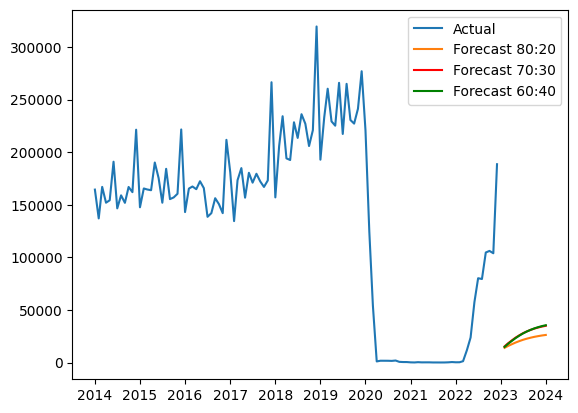

In [48]:
# Plot the results
plt.plot(data.index, data['total_visitor'], label='Actual')
plt.plot(future_dates, y_future_pred_inv, label='Forecast 80:20')
plt.plot(future_dates_30, y_future_pred_inv_30, label='Forecast 70:30', color='red')
plt.plot(future_dates_40, y_future_pred_inv_40, label='Forecast 60:40', color='green')
plt.legend()
plt.show()